In [1]:
import os
import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv(r'Parkinsons Train Data.csv', header = 0)

In [23]:
data.head()

,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,status
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Jitter(local)                        1036 non-null   float64
 1   Jitter(local, absolute)              1036 non-null   float64
 2   Jitter (rap)                         1036 non-null   float64
 3   Jitter (ppq5)                        1036 non-null   float64
 4   Jitter (ddp)                         1036 non-null   float64
 5   Shimmer (local)                      1036 non-null   float64
 6   Shimmer (local, db)                  1036 non-null   float64
 7   Shimmer (apq3)                       1036 non-null   float64
 8   Shimmer (apq5)                       1036 non-null   float64
 9   Shimmer (apq11)                      1036 non-null   float64
 10  Shimmer (dda)                        1036 non-null   float64
 11  AC                            

In [25]:
data.describe()

,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,status
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,...,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,2.683061,0.000171,1.248808,1.349844,3.746424,12.930076,1.196043,5.703438,7.989027,12.228492,...,134.568165,235.156916,109.787645,106.003861,0.006543,0.000844,27.719999,1.137066,12.402600,0.500000
std,1.765841,0.000107,0.980356,1.139726,2.941127,5.455370,0.420063,3.018974,4.847253,6.020609,...,47.117323,121.646214,150.303086,149.691457,0.001874,0.000724,20.978334,1.617100,15.178938,0.500241
min,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,0.517000,...,67.957000,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,0.000000
25%,1.509500,0.000096,0.619250,0.668500,1.857250,9.353500,0.941000,3.703000,5.160250,8.079500,...,100.852250,143.721000,42.000000,40.000000,0.005035,0.000406,8.188500,0.000000,0.000000,0.000000
50%,2.398500,0.000151,1.039000,1.126500,3.117000,12.353500,1.183000,5.134500,7.047500,11.448500,...,127.277000,195.971000,64.000000,62.000000,0.006484,0.000645,26.501000,1.000000,5.864000,0.500000
75%,3.411500,0.000230,1.602500,1.694750,4.808500,15.506250,1.411250,6.977750,9.585250,15.307184,...,159.664750,264.833250,113.000000,109.000000,0.007902,0.000981,43.150000,1.000000,22.408000,1.000000
max,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,44.764000,...,452.083000,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,1.000000


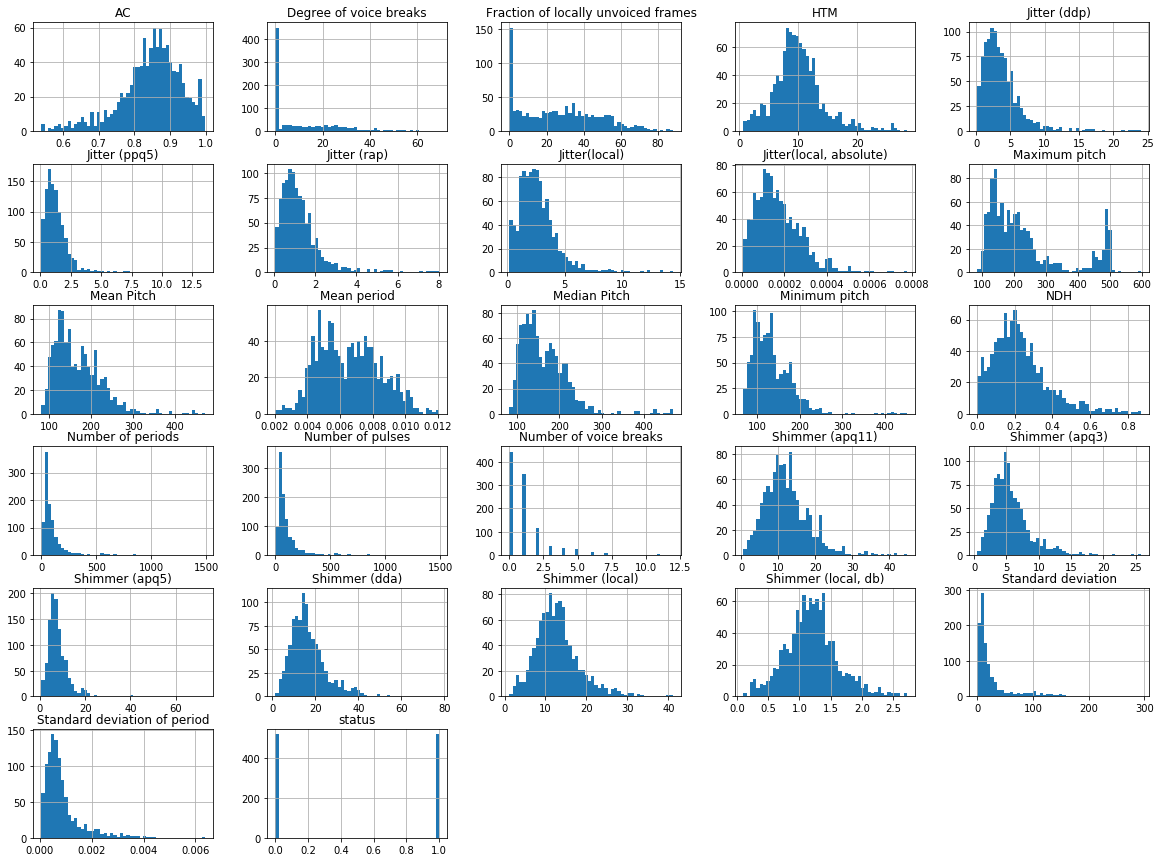

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [4]:
print("Shape of the data is:{}".format(data.shape))

Shape of the data is:(1036, 27)


In [5]:
print("List of columns is: {}".format(list(data.columns)))

List of columns is: ['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch', 'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'status']


In [6]:
for _ in data.columns:
    print("The number of null values in:{} == {}".format(_, data[_].isnull().sum()))

The number of null values in:Jitter(local) == 0
The number of null values in:Jitter(local, absolute) == 0
The number of null values in:Jitter (rap) == 0
The number of null values in:Jitter (ppq5) == 0
The number of null values in:Jitter (ddp) == 0
The number of null values in:Shimmer (local) == 0
The number of null values in:Shimmer (local, db) == 0
The number of null values in:Shimmer (apq3) == 0
The number of null values in:Shimmer (apq5) == 0
The number of null values in:Shimmer (apq11) == 0
The number of null values in:Shimmer (dda) == 0
The number of null values in:AC == 0
The number of null values in:NDH == 0
The number of null values in:HTM == 0
The number of null values in:Median Pitch == 0
The number of null values in:Mean Pitch == 0
The number of null values in:Standard deviation == 0
The number of null values in:Minimum pitch == 0
The number of null values in:Maximum pitch == 0
The number of null values in:Number of pulses == 0
The number of null values in:Number of periods 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
list(data.columns)

['Jitter(local)',
 'Jitter(local, absolute)',
 'Jitter (rap)',
 'Jitter (ppq5)',
 'Jitter (ddp)',
 'Shimmer (local)',
 'Shimmer (local, db)',
 'Shimmer (apq3)',
 'Shimmer (apq5)',
 'Shimmer (apq11)',
 'Shimmer (dda)',
 'AC',
 'NDH',
 'HTM',
 'Median Pitch',
 'Mean Pitch',
 'Standard deviation',
 'Minimum pitch',
 'Maximum pitch',
 'Number of pulses',
 'Number of periods',
 'Mean period',
 'Standard deviation of period',
 'Fraction of locally unvoiced frames',
 'Number of voice breaks',
 'Degree of voice breaks',
 'status']

In [10]:
pred_vars = ['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch', 'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[pred_vars], data['status'], test_size=0.2, random_state=12)

In [13]:
X_train.head()

,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
787,4.496,0.000239,1.275,1.578,3.826,39.874,2.414,25.820,72.860,13.574083,...,66.173,160.162,391.130,59,33,0.005311,0.001375,49.206,1,34.322
438,2.620,0.000200,1.311,1.200,3.934,11.183,1.272,4.091,7.301,9.511000,...,7.415,110.398,142.679,63,60,0.007648,0.000523,36.620,1,14.037
913,1.010,0.000049,0.233,0.295,0.698,4.616,0.467,1.998,2.624,2.902000,...,14.093,159.537,219.945,58,57,0.004819,0.000403,47.170,0,0.000
142,1.195,0.000090,0.598,0.619,1.795,17.900,1.640,4.674,8.994,25.529000,...,1.549,129.879,135.676,24,23,0.007521,0.000103,0.000,0,0.000
298,5.909,0.000424,2.632,2.456,7.895,17.040,1.333,4.513,10.683,4.583000,...,9.184,126.469,159.793,24,23,0.007177,0.000643,6.250,0,0.000


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 787 to 432
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Jitter(local)                        828 non-null    float64
 1   Jitter(local, absolute)              828 non-null    float64
 2   Jitter (rap)                         828 non-null    float64
 3   Jitter (ppq5)                        828 non-null    float64
 4   Jitter (ddp)                         828 non-null    float64
 5   Shimmer (local)                      828 non-null    float64
 6   Shimmer (local, db)                  828 non-null    float64
 7   Shimmer (apq3)                       828 non-null    float64
 8   Shimmer (apq5)                       828 non-null    float64
 9   Shimmer (apq11)                      828 non-null    float64
 10  Shimmer (dda)                        828 non-null    float64
 11  AC                            

In [19]:
param_grid = {"randomforestclassifier__n_estimators" : [10, 20, 30],
             "randomforestclassifier__max_depth" : [None, 6, 8, 10],
             "randomforestclassifier__max_leaf_nodes": [None, 5, 10, 20], 
             "randomforestclassifier__min_impurity_split": [0.1, 0.2, 0.3]}

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreProcessing(BaseEstimator, TransformerMixin):
    """Custom Pre-Processing estimator for our use-case
    """

    def __init__(self):
        pass

    def transform(self, df):
        """Regular transform() that is a help for training, validation & testing datasets
           (NOTE: The operations performed here are the ones that we did prior to this cell)
        """
        pred_vars = ['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch', 'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks']
        df = df[pred_var]
        return df.as_matrix()